# 실행

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(len(X_train))
print(X_train.shape)
print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


In [6]:
print(len(X_test))
print(X_test.shape)
print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


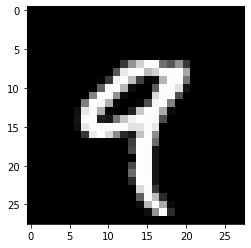

In [7]:
import matplotlib.pyplot as plt
digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [8]:
import numpy as np
np.set_printoptions(linewidth = 150)
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [9]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [12]:
from tensorflow.keras.utils import to_categorical  ## 원핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [14]:
# 모델링

from tensorflow.keras import models, layers

Mnist = models.Sequential()
Mnist.add(layers.Dense(512, activation='relu', input_shape = (28*28,)))
Mnist.add(layers.Dense(256, activation='relu'))
Mnist.add(layers.Dense(10, activation='softmax'))

In [15]:
Mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
Mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


In [ ]:
%%time

Hist_mnist = Mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

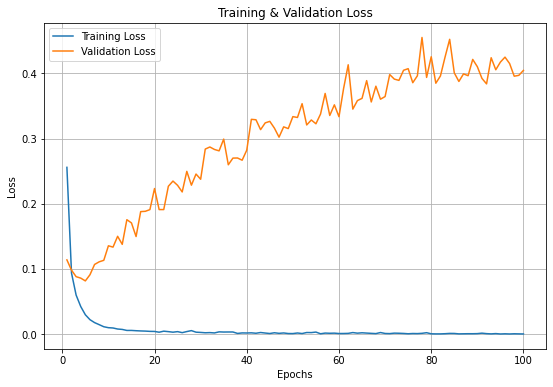

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [19]:
# 모델 평가
loss, accuracy = Mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.9828
Loss = 0.31103
Accuracy = 0.98280


In [20]:
# predict
np.set_printoptions(suppress = True, precision = 9)
print(Mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [21]:
print(Mnist.predict_classes(X_test[:1,:]))

[7]


In [23]:
# 모델링_l2

from tensorflow.keras import models, layers, regularizers

Mnist_L2 = models.Sequential()
Mnist_L2.add(layers.Dense(512, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001),
                       input_shape = (28*28,)))
Mnist_L2.add(layers.Dense(256, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
Mnist_L2.add(layers.Dense(10, activation='softmax'))

Mnist_L2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


In [25]:
%%time

Hist_mnist_l2 = Mnist_L2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2583 - accuracy: 0.9240 - val_loss: 0.1405 - val_accuracy: 0.9597
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1023 - accuracy: 0.9722 - val_loss: 0.1190 - val_accuracy: 0.9660
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9811 - val_loss: 0.1050 - val_accuracy: 0.9733
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0547 - accuracy: 0.9863 - val_loss: 0.1034 - val_accuracy: 0.9737
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9894 - val_loss: 0.1065 - val_accuracy: 0.9753
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9916 - val_loss: 0.0895 - val_accuracy: 0.9807
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9929 - val_loss: 0.0958 - val_accuracy: 0.9772

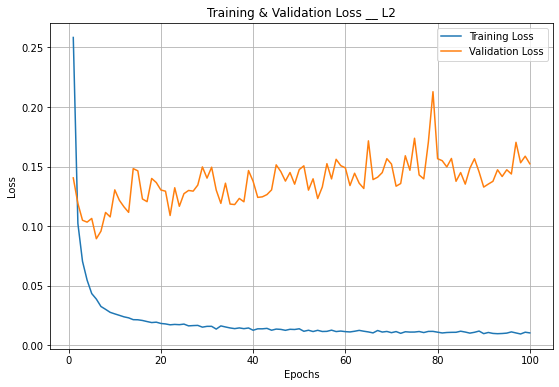

In [26]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_l2.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_l2.history['loss'])
plt.plot(epochs, Hist_mnist_l2.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [28]:
# 모델링_Dropout

from tensorflow.keras import models, layers

Mnist_Dro = models.Sequential()
Mnist_Dro.add(layers.Dense(512, activation='relu',input_shape = (28*28,)))
Mnist_Dro.add(layers.Dropout(0.4))
Mnist_Dro.add(layers.Dense(256, activation='relu'))
Mnist_Dro.add(layers.Dropout(0.2))
Mnist_Dro.add(layers.Dense(10, activation='softmax'))

Mnist_Dro.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [29]:
%%time

Hist_mnist_Drop = Mnist_Dro.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3184 - accuracy: 0.9022 - val_loss: 0.1425 - val_accuracy: 0.9569
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1464 - accuracy: 0.9559 - val_loss: 0.0999 - val_accuracy: 0.9704
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1119 - accuracy: 0.9660 - val_loss: 0.0918 - val_accuracy: 0.9727
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0902 - accuracy: 0.9730 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.0899 - val_accuracy: 0.9758
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.0888 - val_accuracy: 0.9777
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.0882 - val_accuracy: 0.9799

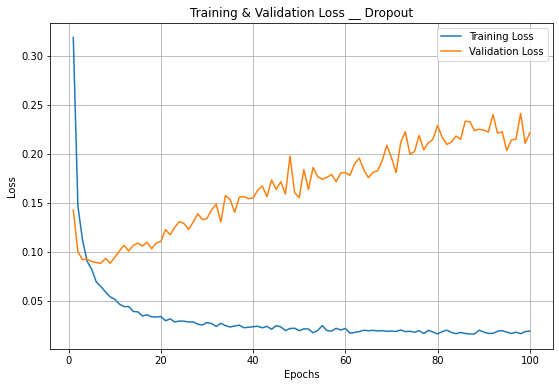

In [30]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_Drop.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_Drop.history['loss'])
plt.plot(epochs, Hist_mnist_Drop.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [31]:
# 모델링_Batch

from tensorflow.keras import models, layers

Mnist_Batch = models.Sequential()
Mnist_Batch.add(layers.Dense(512, input_shape = (28*28,)))
Mnist_Batch.add(layers.BatchNormalization())
Mnist_Batch.add(layers.Activation('relu'))
Mnist_Batch.add(layers.Dense(256))
Mnist_Batch.add(layers.BatchNormalization())
Mnist_Batch.add(layers.Activation('relu'))
Mnist_Batch.add(layers.Dense(10, activation='softmax'))

Mnist_Batch.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [32]:
%%time

Hist_mnist_Batch = Mnist_Batch.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.1802 - accuracy: 0.9474 - val_loss: 0.1001 - val_accuracy: 0.9697
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.0937 - val_accuracy: 0.9703
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0877 - val_accuracy: 0.9754
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0936 - val_accuracy: 0.9757
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0938 - val_accuracy: 0.9760
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.0965 - val_accuracy: 0.9772
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.1056 - val_accuracy: 0.9747

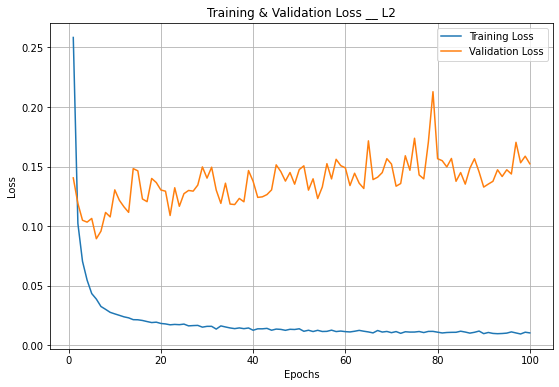

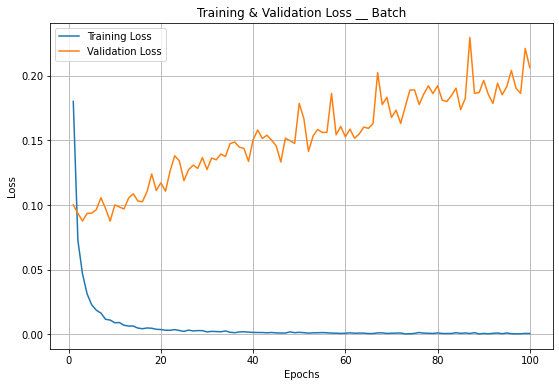

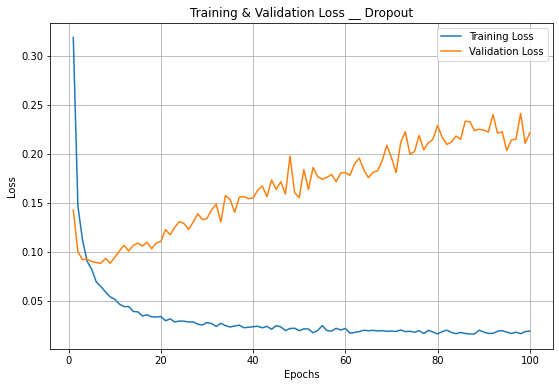

In [35]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist_Batch.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_l2.history['loss'])
plt.plot(epochs, Hist_mnist_l2.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_Batch.history['loss'])
plt.plot(epochs, Hist_mnist_Batch.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ Batch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_Drop.history['loss'])
plt.plot(epochs, Hist_mnist_Drop.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [36]:
# 모델링_Batch & Dropout

from tensorflow.keras import models, layers

Mnist_BD = models.Sequential()
Mnist_BD.add(layers.Dense(512, input_shape = (28*28,)))
Mnist_BD.add(layers.BatchNormalization())
Mnist_BD.add(layers.Activation('relu'))
Mnist_BD.add(layers.Dropout(0.4))
Mnist_BD.add(layers.Dense(256))
Mnist_BD.add(layers.BatchNormalization())
Mnist_BD.add(layers.Activation('relu'))
Mnist_BD.add(layers.Dropout(0.2))
Mnist_BD.add(layers.Dense(10, activation='softmax'))

Mnist_BD.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [37]:
%%time

Hist_mnist_BD = Mnist_BD.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2790 - accuracy: 0.9159 - val_loss: 0.1229 - val_accuracy: 0.9629
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1404 - accuracy: 0.9571 - val_loss: 0.1106 - val_accuracy: 0.9675
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1122 - accuracy: 0.9653 - val_loss: 0.0854 - val_accuracy: 0.9764
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0942 - accuracy: 0.9708 - val_loss: 0.0860 - val_accuracy: 0.9762
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0828 - accuracy: 0.9740 - val_loss: 0.0775 - val_accuracy: 0.9785
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0747 - accuracy: 0.9769 - val_loss: 0.0825 - val_accuracy: 0.9787
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0666 - accuracy: 0.9793 - val_loss: 0.0742 - val_accuracy: 0.9807

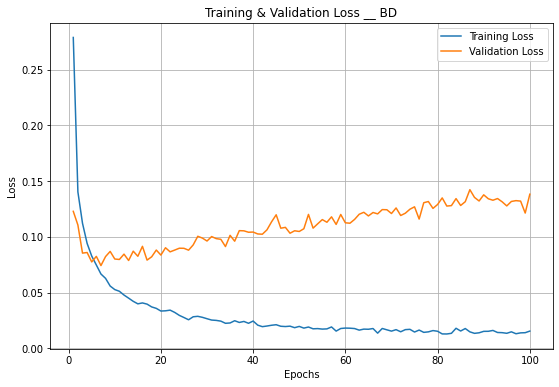

In [39]:
plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_BD.history['loss'])
plt.plot(epochs, Hist_mnist_BD.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ BD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [41]:
# 모델링_Batch & L2

from tensorflow.keras import models, layers, regularizers

Mnist_BL2 = models.Sequential()
Mnist_BL2.add(layers.Dense(512, input_shape = (28*28,),kernel_regularizer = regularizers.l2(0.00001)))
Mnist_BL2.add(layers.BatchNormalization())
Mnist_BL2.add(layers.Activation('relu'))
Mnist_BL2.add(layers.Dense(256,kernel_regularizer = regularizers.l2(0.00001)))
Mnist_BL2.add(layers.BatchNormalization())
Mnist_BL2.add(layers.Activation('relu'))
Mnist_BL2.add(layers.Dense(10, activation='softmax'))

Mnist_BL2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [42]:
%%time

Hist_mnist_BL2 = Mnist_BL2.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 0.1868 - accuracy: 0.9463 - val_loss: 0.1362 - val_accuracy: 0.9622
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0814 - accuracy: 0.9778 - val_loss: 0.0979 - val_accuracy: 0.9731
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0568 - accuracy: 0.9849 - val_loss: 0.0963 - val_accuracy: 0.9739
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0440 - accuracy: 0.9897 - val_loss: 0.1022 - val_accuracy: 0.9740
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0345 - accuracy: 0.9923 - val_loss: 0.1256 - val_accuracy: 0.9721
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9924 - val_loss: 0.1110 - val_accuracy: 0.9743
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0286 - accuracy: 0.9945 - val_loss: 0.1002 - val_accuracy: 0.9792

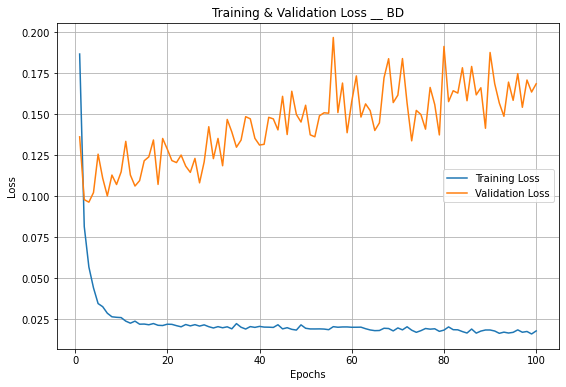

In [43]:
plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist_BL2.history['loss'])
plt.plot(epochs, Hist_mnist_BL2.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss __ BD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()